# Pymaceuticals Inc.
---

### Analysis

- There is a positive correlation between the weight of mice and the tumor size and therefore there is a direct correlation and as one goes up so does the other and vice versa. The correlatoin coefficient using a linear regression is 0.84 which is fairly high and tells use that the relationship follows a linear trend.

- Capomulin has had some good results when it comes to treating the tumors of mice. As time went on for mouse l509, the tumor decreased in volume.

- Of the 4 drugs analyzed in the end of the report, Capomulin and Ramicane are most effective when it comes to treating the tumors of mice.
 

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
results_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [117]:
# Checking the number of mice.
mice_count = len(results_df["Mouse ID"].unique())
mice_count

249

In [118]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = results_df[results_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [119]:
# Optional: Get all the data for the duplicate mouse ID.
index_ID_df = results_df.set_index('Mouse ID')
index_ID_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [120]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results_df = index_ID.drop(['g989'])
clean_results_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
f932,0,45.000000,0,Ketapril,Male,15,29
g107,0,45.000000,0,Ketapril,Female,2,29
a457,0,45.000000,0,Ketapril,Female,11,30
c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...
r944,45,41.581521,2,Capomulin,Male,12,25
u364,45,31.023923,3,Capomulin,Male,18,17
p438,45,61.433892,1,Ceftamin,Female,11,26


In [121]:
# Checking the number of mice in the clean DataFrame.
clean_results_df = clean_results_df.reset_index()
new_mice_count = len(clean_results_df["Mouse ID"].unique())
new_mice_count

248

## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_drug = clean_results_df.groupby(['Drug Regimen'])
tumor_mean = tumor_drug['Tumor Volume (mm3)'].mean()
tumor_med = tumor_drug['Tumor Volume (mm3)'].median()
tumor_var = tumor_drug['Tumor Volume (mm3)'].var()
tumor_std = tumor_drug['Tumor Volume (mm3)'].std()
tumor_sem = tumor_drug['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame({
                        "Mean Tumor Volume": tumor_mean,
                        "Median Tumor Volume" : tumor_med,
                        "Tumor Volume Variance" : tumor_var,
                        "Tumor Volume Std. Dev." : tumor_std,
                        "Tumor Volume Std. Err" : tumor_sem
                        })
tumor_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor2_df = clean_results_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

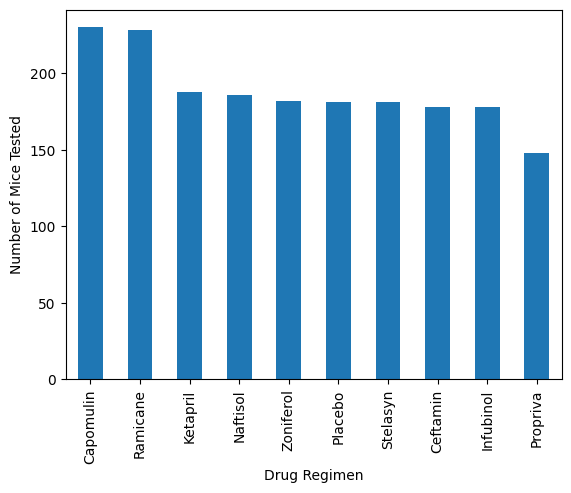

In [124]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_df = clean_results_df.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint_df.sort_values(ascending=False).plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

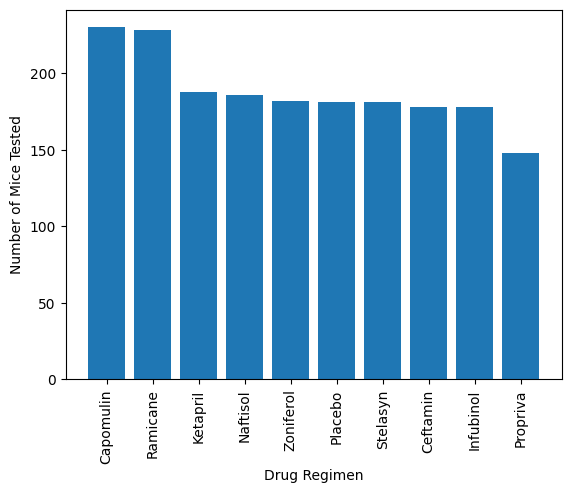

In [125]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_desc = timepoint_df.sort_values(ascending=False)
plt.bar(timepoint_desc.index, timepoint_desc.values)
plt.ylabel('Number of Mice Tested', size=10)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()

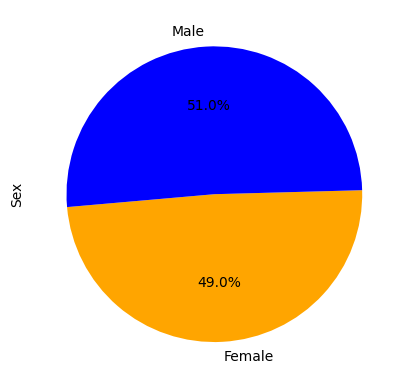

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_results_df.groupby(['Sex'])['Sex'].count()
sex.plot.pie(autopct='%1.1f%%',colors=["orange","blue"],startangle=185)
plt.show()

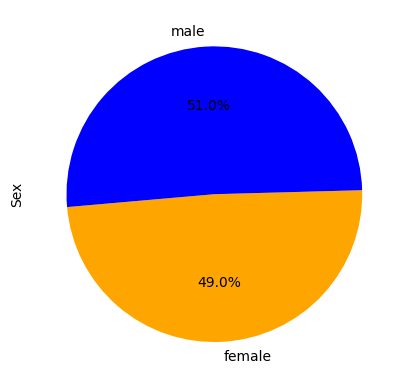

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex,labels=('female','male'),startangle=185,colors=["orange","blue"],autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tm = clean_results_df.groupby(['Mouse ID'])['Timepoint'].max()
last_tm_df = pd.DataFrame(last_tm)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.merge(clean_results_df, last_tm_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df = last_df.reset_index()
last_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,a203,45,67.973419,2,Infubinol,Female,20,23
1,1,a251,45,65.525743,1,Infubinol,Female,21,25
2,2,a262,45,70.717621,4,Placebo,Female,17,29
3,3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [163]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_df.loc[last_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset 
    total_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


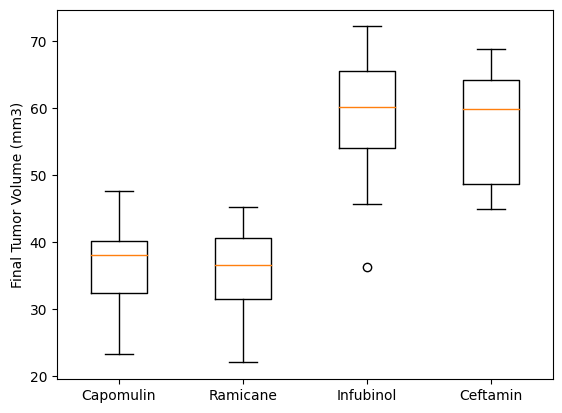

In [166]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(total_tumor_vol, labels=treatments)
plt.show()

## Line and Scatter Plots

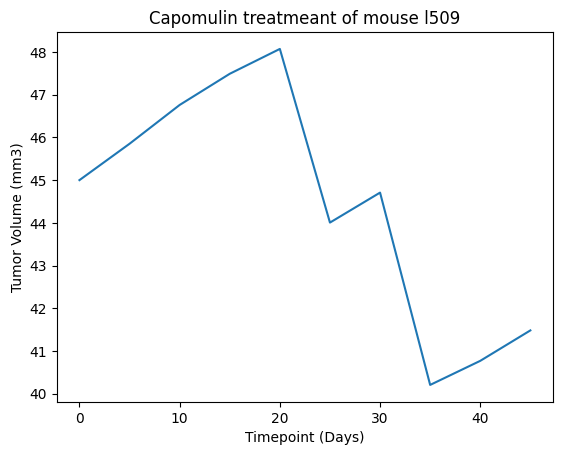

In [172]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = clean_results_df.loc[clean_results_df["Mouse ID"] == "l509",:]
x_axisTP = line_df["Timepoint"] 
tumsiz = line_df["Tumor Volume (mm3)"] 
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

C:\Users\jordan_anderson\AppData\Local\Temp\ipykernel_11412\1205925419.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capavg = cap_df.groupby(['Mouse ID']).mean()


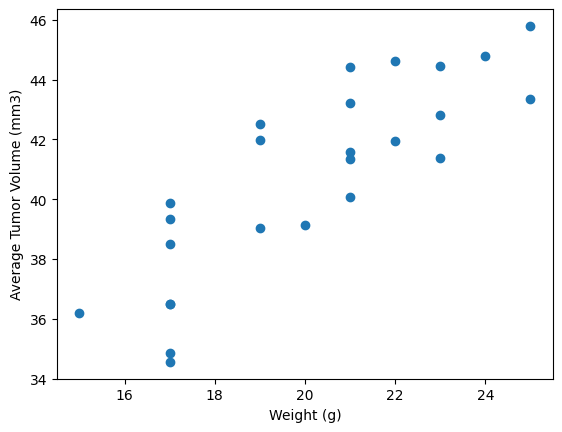

In [176]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = clean_results_df.loc[clean_results_df["Drug Regimen"] == "Capomulin",:]
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


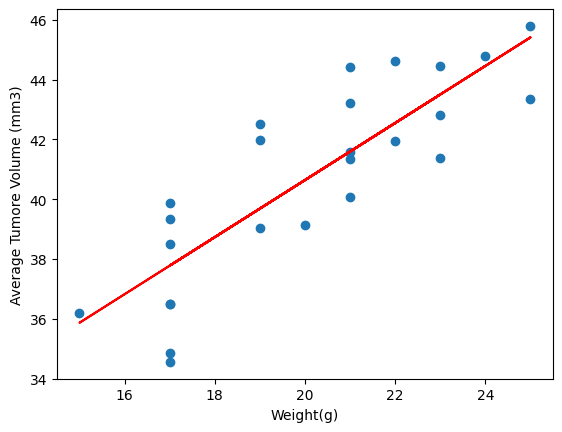

In [198]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
slope=0.9544396890241049
intercept=21.552160532685008
line = slope*(capavg['Weight (g)'])+intercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()